## Beginning - Data Preparation & Cleaning

In [ ]:
# Install Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Data
df = pd.read_csv('data/hour.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.shape

(17379, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Check for Null Values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Date Conversion
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
# Check season vs month mapping to ensure correct labelling
print("Crosstab of Season vs Month:")
print(pd.crosstab(df['season'], df['mnth']))

Crosstab of Season vs Month:
mnth      1     2    3     4     5    6     7     8     9     10    11   12
season                                                                     
1       1429  1341  949     0     0    0     0     0     0     0     0  523
2          0     0  524  1437  1488  960     0     0     0     0     0    0
3          0     0    0     0     0  480  1488  1475  1053     0     0    0
4          0     0    0     0     0    0     0     0   384  1451  1437  960


In [ ]:
df[['season', 'weathersit']].head()

,season,weathersit
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# 4. create mapping dictionaries for readability in plots later
# (Note: We use these for plotting, but the raw numbers are often better for MOdelling)
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Precip', 4: 'Heavy Precip'}
weekday_map = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
yr_map = {0: '2011', 1: '2012'}





# Create a copy for Visualization so we don't mess up the original data for modeling
df_viz = df.copy()
df_viz['season_label'] = df_viz['season'].map(season_map)
df_viz['weather_label'] = df_viz['weathersit'].map(weather_map)
df_viz['weekday_label'] = df_viz['weekday'].map(weekday_map)
df_viz['yr_label'] = df_viz['yr'].map(yr_map)

## Exploratory Data Analysis

### Data Visualization

In [ ]:
# Set global plot style
sns.set_style("whitegrid")

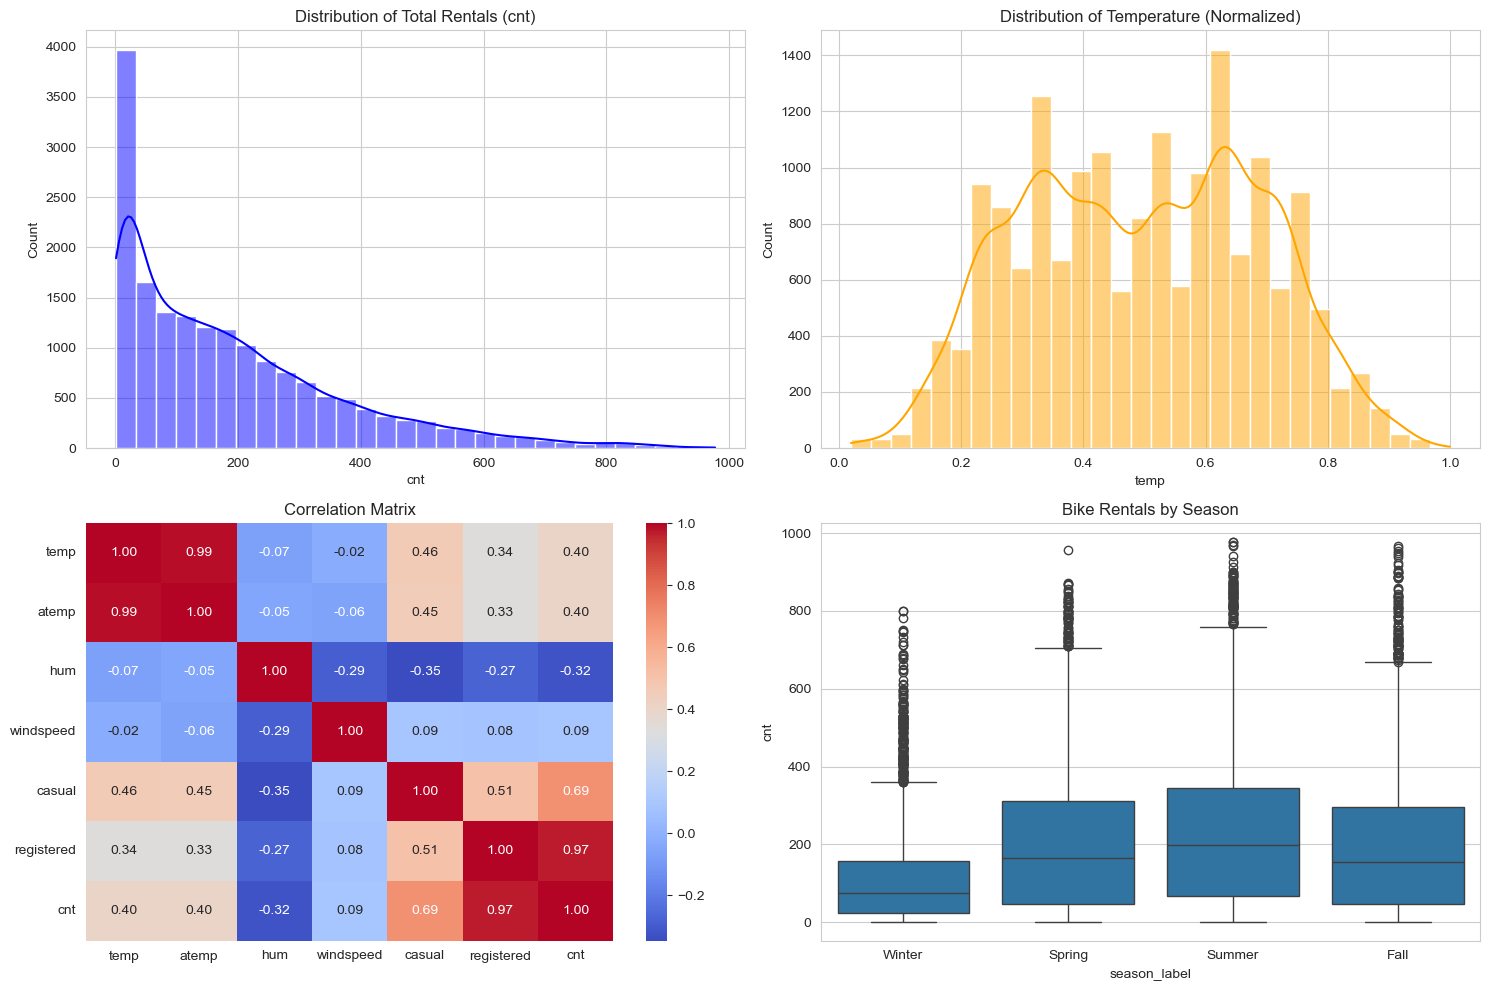

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# 1. Distribution of Count
plt.subplot(2, 2, 1)
sns.histplot(df['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Rentals (cnt)')

# 2. Distribution of Temperature
plt.subplot(2, 2, 2)
sns.histplot(df['temp'], kde=True, bins=30, color='orange')
plt.title('Distribution of Temperature (Normalized)')

#3 . Correlation Heatmap
plt.subplot(2, 2, 3)
# Select numerical columns for correlation
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# 4. Boxplot of Count by Season
plt.subplot(2, 2, 4)
sns.boxplot(x='season_label', y='cnt', data=df_viz, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Bike Rentals by Season')

plt.tight_layout()
plt.savefig('eda_set1.png')

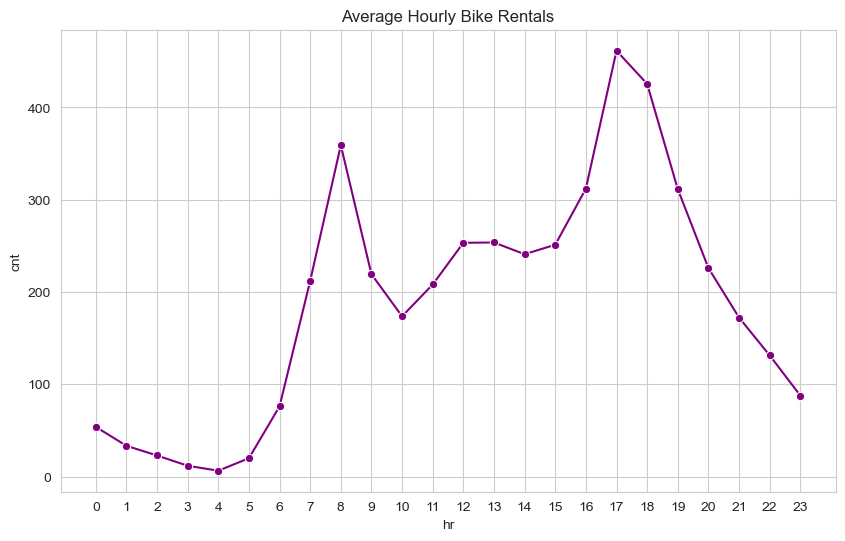

In [ ]:
# 5. Hourly Trend (Average)
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=df_viz, ci=None, marker='o', color='purple')
plt.title('Average Hourly Bike Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

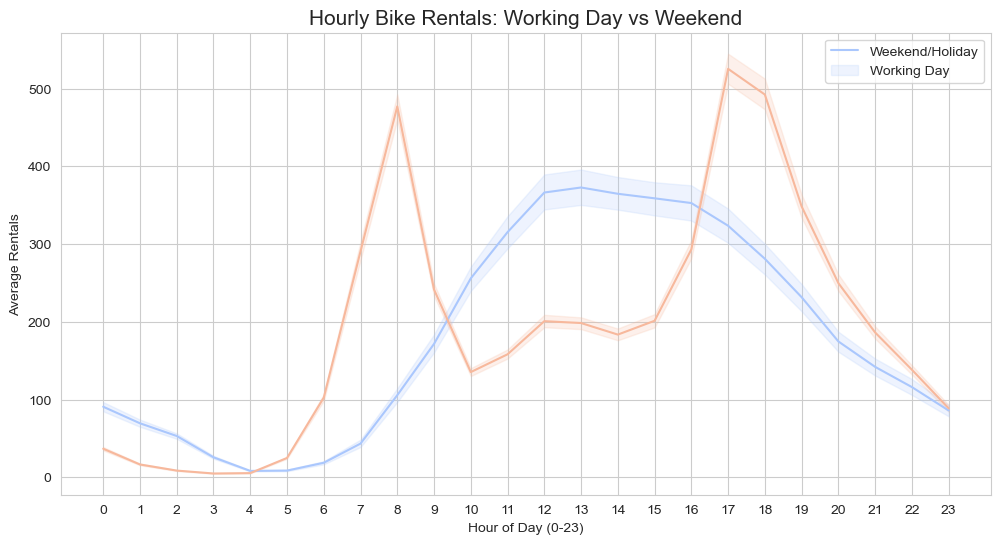

In [ ]:

# --- Plot 6: The Hourly Trend (The "Commute" Pattern) ---
plt.figure(figsize=(12, 6))
# We group by hour and take the mean to see the average day
sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_viz, palette='coolwarm')
plt.title('Hourly Bike Rentals: Working Day vs Weekend', fontsize=15)
plt.ylabel('Average Rentals')
plt.xlabel('Hour of Day (0-23)')
plt.xticks(range(0, 24))
plt.legend(['Weekend/Holiday', 'Working Day'])
plt.show()

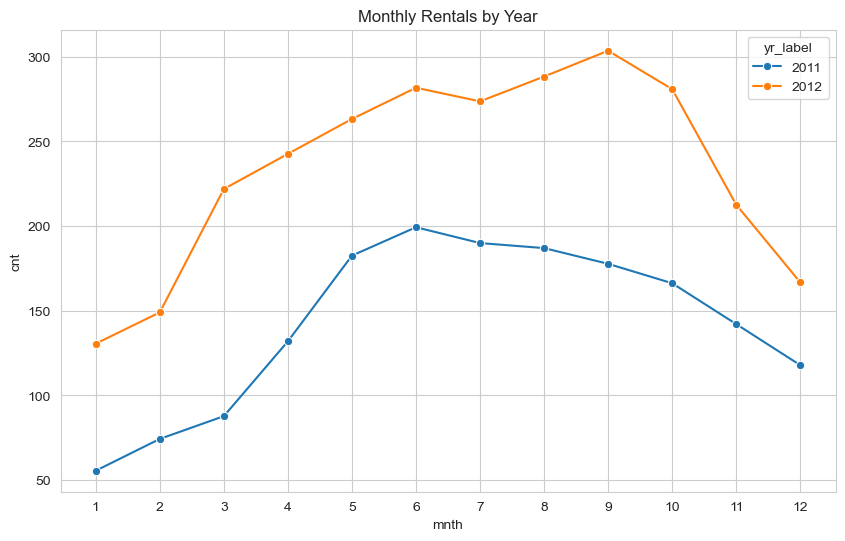

In [ ]:
# 7. Monthly Trend by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr_label', data=df_viz, ci=None, marker='o')
plt.title('Monthly Rentals by Year')
plt.xticks(range(1, 13))
plt.grid(True)

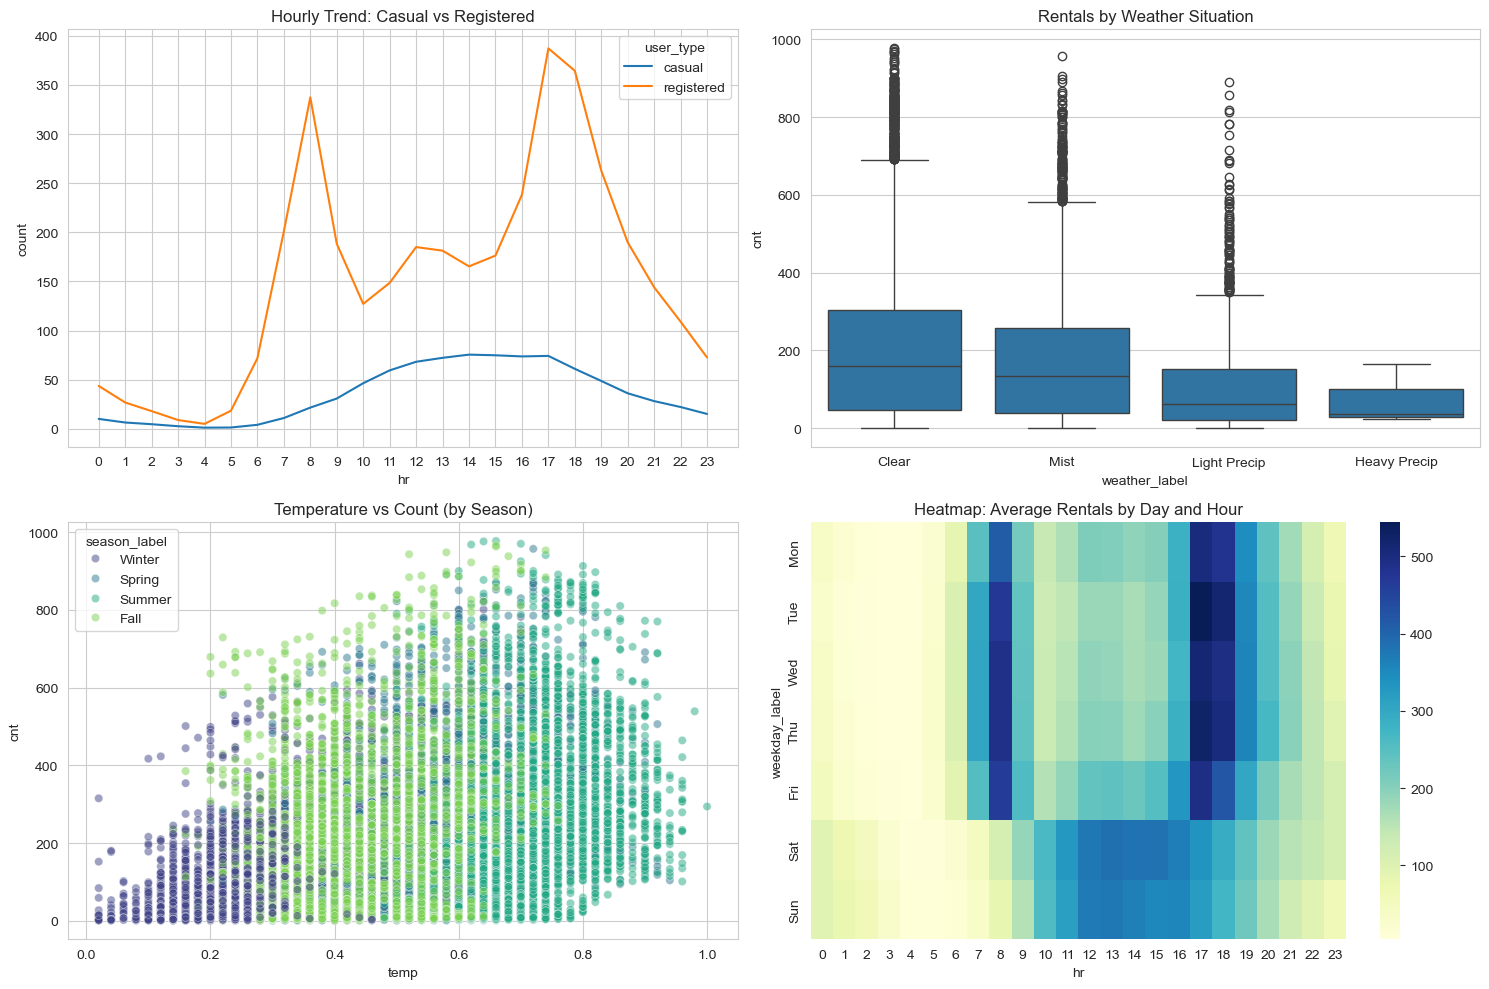

In [ ]:
plt.figure(figsize=(15, 10))

# 8. Casual vs Registered Hourly Pattern
plt.subplot(2, 2, 1)
# Melt the dataframe to have 'casual' and 'registered' in one column for easy plotting with hue
df_melted = df.melt(id_vars=['hr'], value_vars=['casual', 'registered'], var_name='user_type', value_name='count')
sns.lineplot(x='hr', y='count', hue='user_type', data=df_melted, ci=None)
plt.title('Hourly Trend: Casual vs Registered')
plt.xticks(range(0, 24))
plt.grid(True)

# 9. Count vs Weather Situation
plt.subplot(2, 2, 2)
sns.boxplot(x='weather_label', y='cnt', data=df_viz, order=['Clear', 'Mist', 'Light Precip', 'Heavy Precip'])
plt.title('Rentals by Weather Situation')

# 10. Interaction: Temp vs Count colored by Season
plt.subplot(2, 2, 3)
sns.scatterplot(x='temp', y='cnt', hue='season_label', data=df_viz, alpha=0.5, palette='viridis')
plt.title('Temperature vs Count (by Season)')

# 11. Heatmap: Weekday vs Hour
plt.subplot(2, 2, 4)
# Pivot table for heatmap
heatmap_data = df_viz.pivot_table(index='weekday_label', columns='hr', values='cnt', aggfunc='mean')
# Reorder index to be Mon-Sun
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data = heatmap_data.reindex(days_order)
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap: Average Rentals by Day and Hour')

plt.tight_layout()
plt.savefig('eda_set3.png')

## Feature Engineering

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# A. Create "Rush Hour" Feature
# Logic: If it's a working day AND the hour is 7-9 or 17-19 (5-7 PM)
def identify_rush_hour(row):
    if row['workingday'] == 1:
        if row['hr'] in [7, 8, 9, 17, 18, 19]:
            return 1
    return 0

df['is_rush_hour'] = df.apply(identify_rush_hour, axis=1)

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_rush_hour
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0


In [ ]:
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

df['is_weekend'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_weekend, dtype: int32

In [ ]:
df['hr'].value_counts()

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_rush_hour,is_weekend
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0,1


In [ ]:
# B. Select Features & Drop Irrelevant/Redundant ones
# - instant: ID column (useless)
# - dteday: Time series info is already in yr, mnth, hr
# - atemp: Highly correlated with temp (0.99), so we drop it to avoid multicollinearity
# - casual, registered: These SUM up to 'cnt', so they are "leakage" (cheating)

features_to_drop = ['instant', 'dteday', 'atemp', 'casual', 'registered']
target = 'cnt'

## Data Modelling

📌 Implementation Logic
- Sort data by datetime
- Split chronologically

`“Because bike demand depends on temporal patterns, we use a time-based split to avoid leakage from future information.”`

In [ ]:
def time_based_split(df, train_ratio=0.7, val_ratio=0.15):
    df = df.sort_values('dteday')

    n = len(df)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))

    train_df = df.iloc[:train_end]
    val_df = df.iloc[train_end:val_end]
    test_df = df.iloc[val_end:]

    return train_df, val_df, test_df

In [ ]:
train_df, val_df, test_df = time_based_split(df)

In [ ]:
train_df = train_df.drop(columns=features_to_drop)
val_df = val_df.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)

### Baseline: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler

# Separate features and target
X_train, y_train = train_df.drop(columns=target), train_df[target]
X_val, y_val = val_df.drop(columns=target), val_df[target]

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the validation data using the same scaler
X_val_scaled = scaler.transform(X_val)

# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
val_preds = lr.predict(X_val_scaled)

rmse = mean_squared_error(y_val, val_preds, squared=False)
mae = mean_absolute_error(y_val, val_preds)

print(f"Linear Regression RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Linear Regression RMSE: 146.81, MAE: 122.19


In [ ]:
X_train_scaled.shape

(12165, 13)

In [ ]:
X_train_scaled[:5]

array([[-1.11671392, -0.63810013, -1.32644303, -1.67288781, -0.16776178,
         1.49149388, -1.47324325, -0.66990672, -1.20989288,  0.91296346,
        -1.56885604, -0.45651254,  1.56997606],
       [-1.11671392, -0.63810013, -1.32644303,  1.65562634, -0.16776178,
         1.49149388, -1.47324325,  0.86395649, -0.04315067,  1.26249925,
         0.81816021, -0.45651254,  1.56997606],
       [-1.11671392, -0.63810013, -1.32644303,  1.51090833, -0.16776178,
         1.49149388, -1.47324325,  0.86395649, -0.36135309,  1.56210137,
         0.22160606, -0.45651254,  1.56997606],
       [-1.11671392, -0.63810013, -1.32644303,  1.36619032, -0.16776178,
         1.49149388, -1.47324325,  0.86395649, -0.36135309,  1.21256557,
        -0.0174954 , -0.45651254,  1.56997606],
       [-1.11671392, -0.63810013, -1.32644303,  1.22147232, -0.16776178,
         1.49149388, -1.47324325,  0.86395649, -0.36135309,  1.21256557,
         0.45990785, -0.45651254,  1.56997606]])

### Non-Linear Baseline: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

val_preds = rf.predict(X_val)

rmse = mean_squared_error(y_val, val_preds, squared=False)
mae = mean_absolute_error(y_val, val_preds)

print(f"Random Forest RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Random Forest RMSE: 73.00, MAE: 46.72


#### RandomForestRegressor with Scaled Values

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

val_preds = rf.predict(X_val_scaled)

rmse = mean_squared_error(y_val, val_preds, squared=False)
mae = mean_absolute_error(y_val, val_preds)

print(f"Random Forest RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Random Forest RMSE: 72.96, MAE: 46.71


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

val_preds = rf.predict(X_val_scaled)

rmse = mean_squared_error(y_val, val_preds, squared=False)
mae = mean_absolute_error(y_val, val_preds)

print(f"Random Forest RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Random Forest RMSE: 72.81, MAE: 46.48


 - `Slight Differences in the score`

In [ ]:
# Test Set Evaluation
X_test, y_test = test_df.drop(columns=target), test_df[target]
test_preds = rf.predict(X_test)
rmse = mean_squared_error(y_test, test_preds, squared=False)
mae = mean_absolute_error(y_test, test_preds)
print(f"Random Forest Test RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Random Forest Test RMSE: 76.49, MAE: 51.11


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbr.fit(X_train, y_train)

val_preds = gbr.predict(X_val)

rmse = mean_squared_error(y_val, val_preds, squared=False)
mae = mean_absolute_error(y_val, val_preds)

print(f"Gradient Boosting RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Gradient Boosting RMSE: 69.17, MAE: 48.03


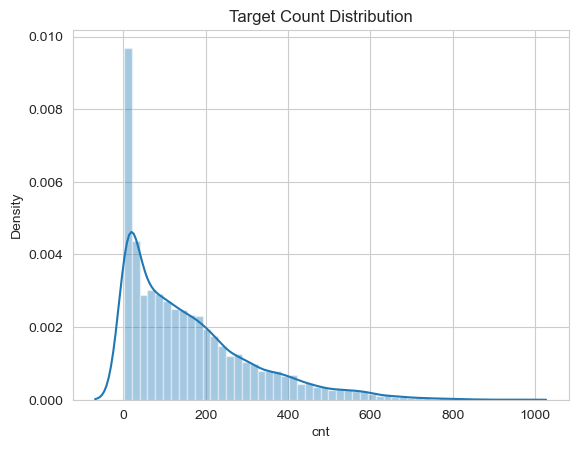

In [ ]:
plt.title("Target Count Distribution")
sns.distplot(train_df[target])
plt.show()

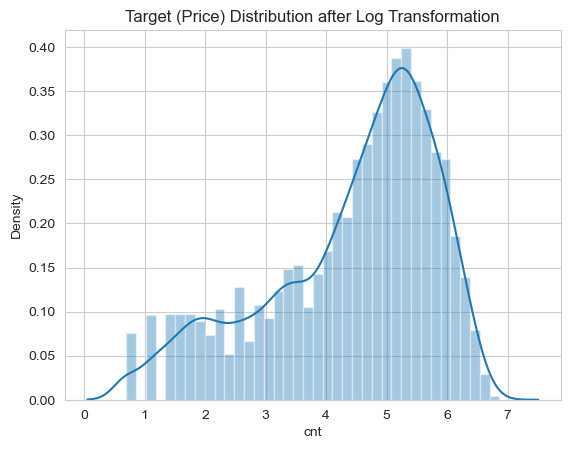

In [ ]:
y_transformed = pd.Series(np.log1p(train_df[target]))
plt.title("Target (Price) Distribution after Log Transformation")
sns.distplot(y_transformed)
plt.show()

``Things to Improve Upon``
- Use Log Transform for the Target Column
- Use Other Algorithms like XGBoost, CatBoost, LightGBM